## Simple Data Science Process Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will use the diabetes dataset for the Pima tribe. You can find it on Kaggle here:
<a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database">https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database</a>

In [2]:
pima = pd.read_csv("diabetes.csv")

In [3]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#split dataset in features and target variable. Leave Outcome in the dataset until we are done with EDA
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']
X = pima[feature_cols] # Features
y = pima['Outcome'] # Target variable

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

### Let's do some EDA

                                             |          | [  0%]   00:00 -> (? left)


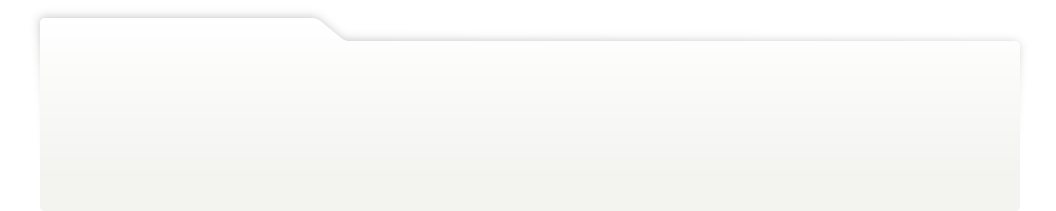
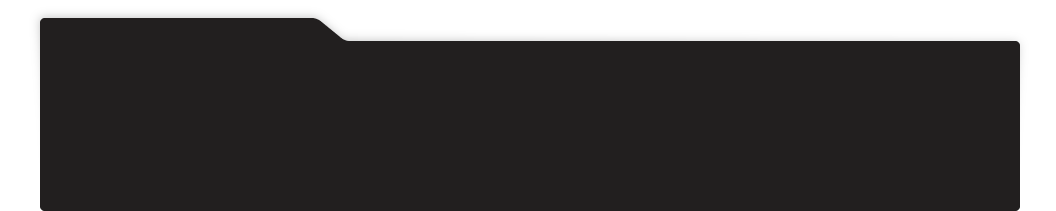
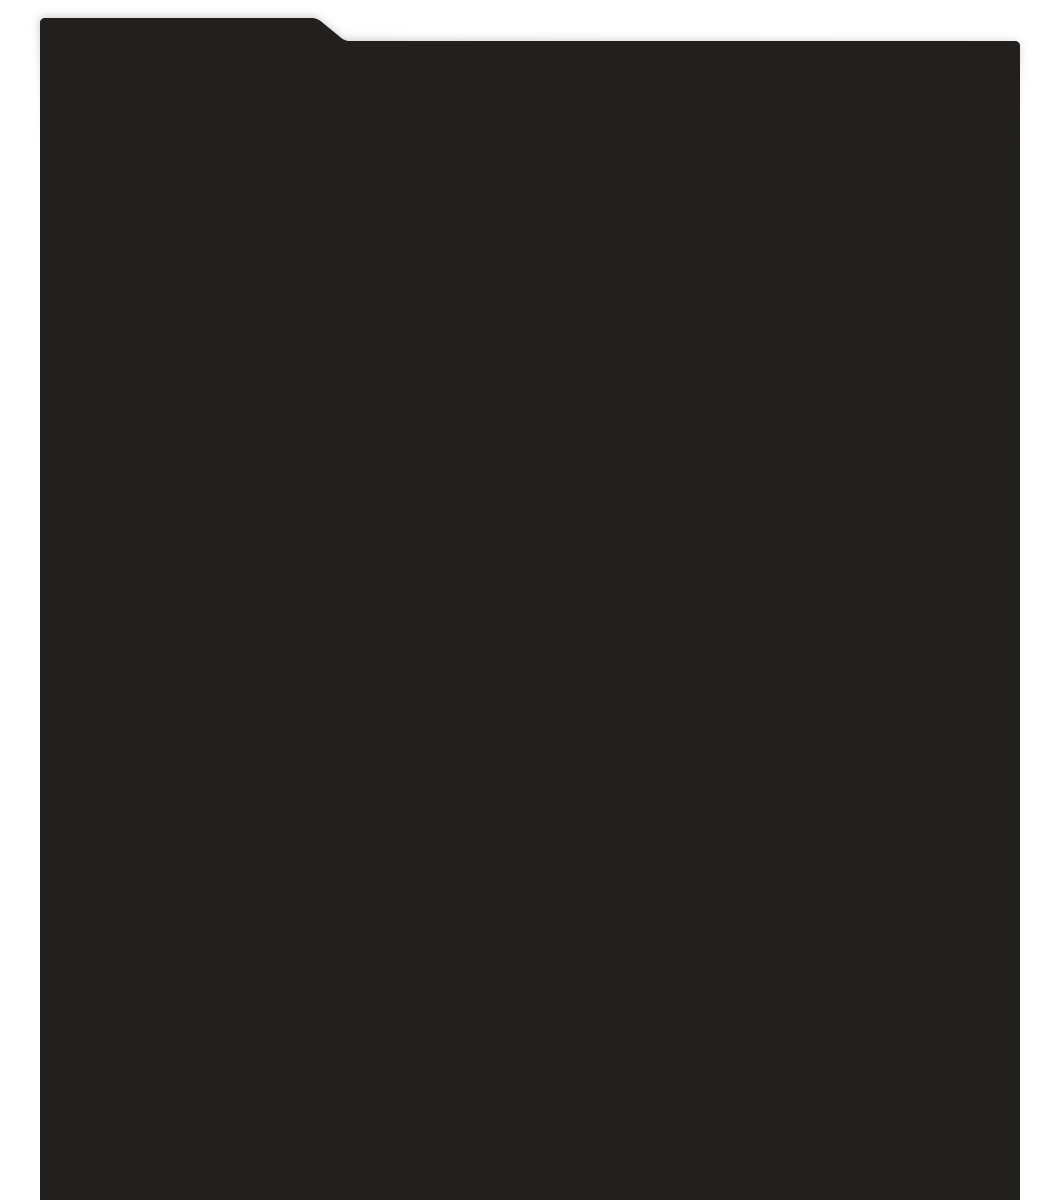
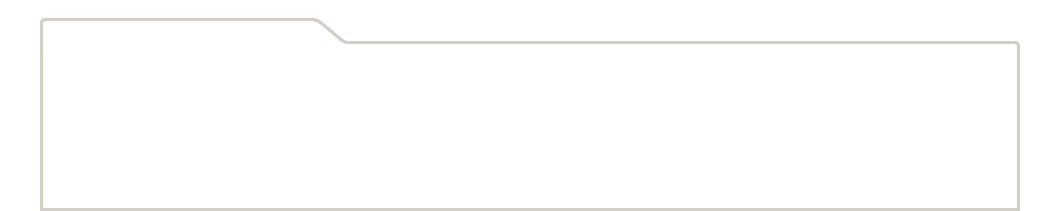
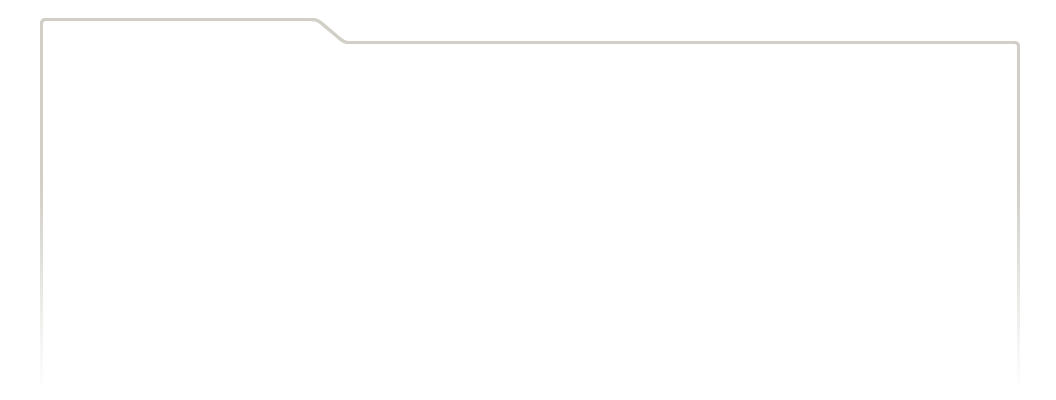
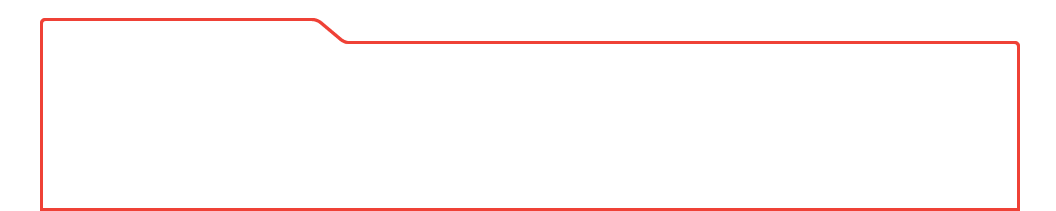
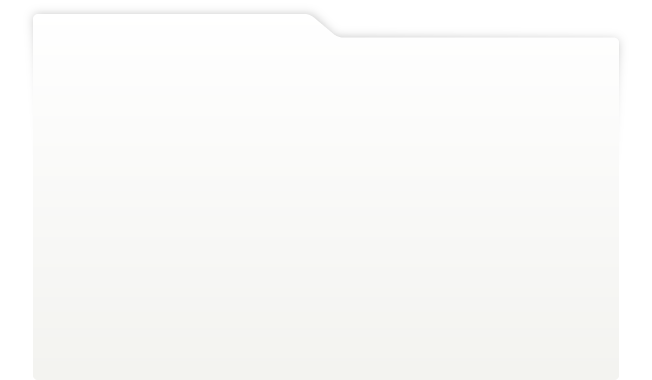
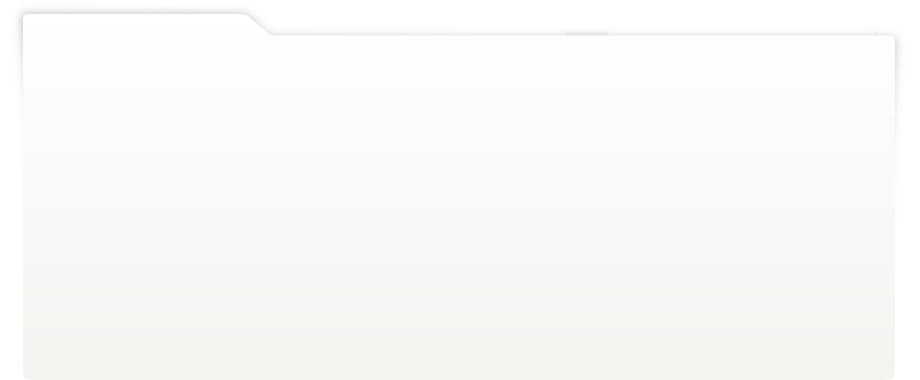
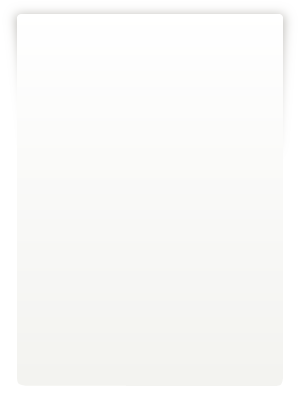
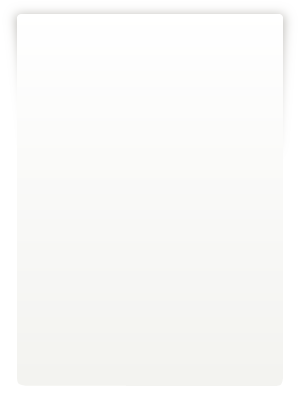
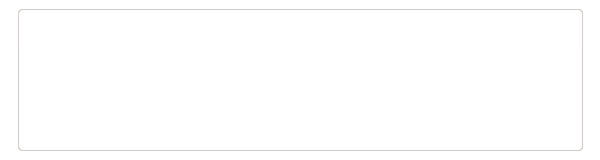
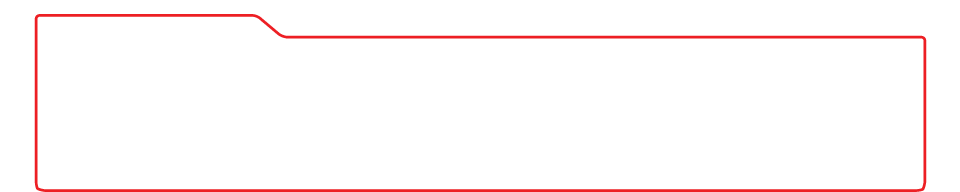
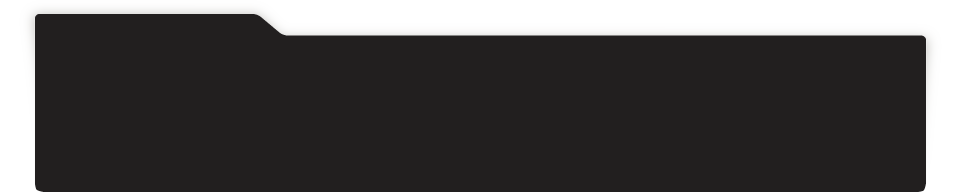
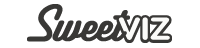
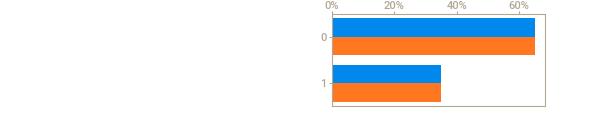
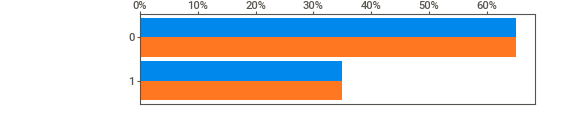
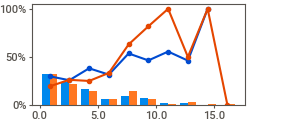
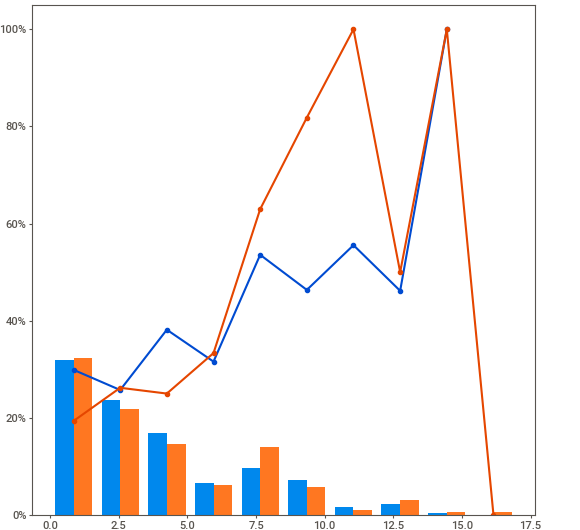
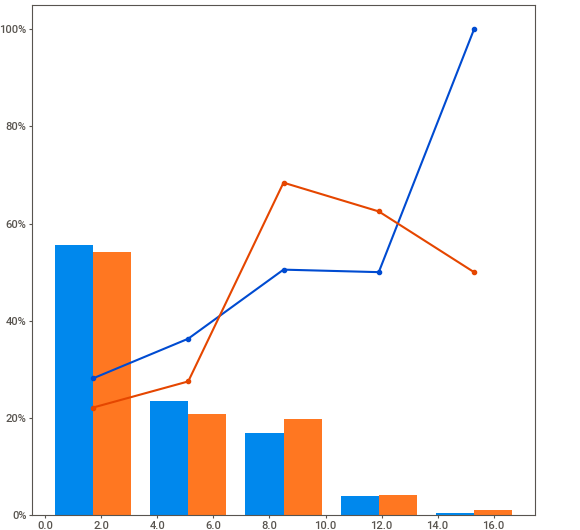
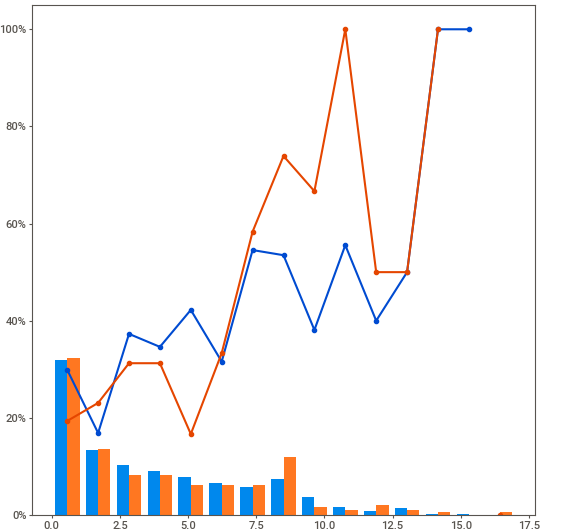
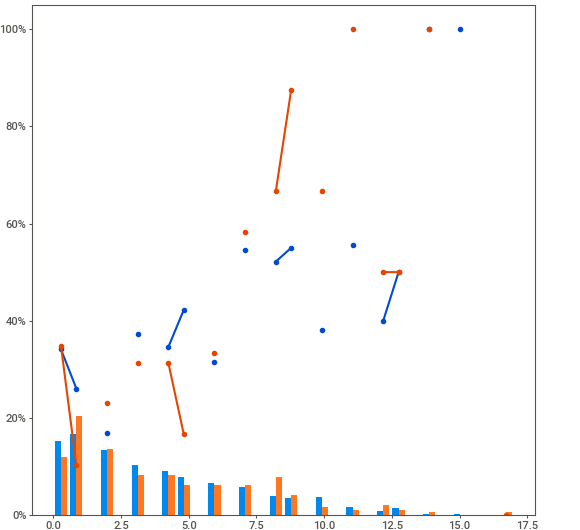
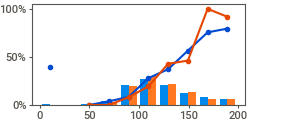
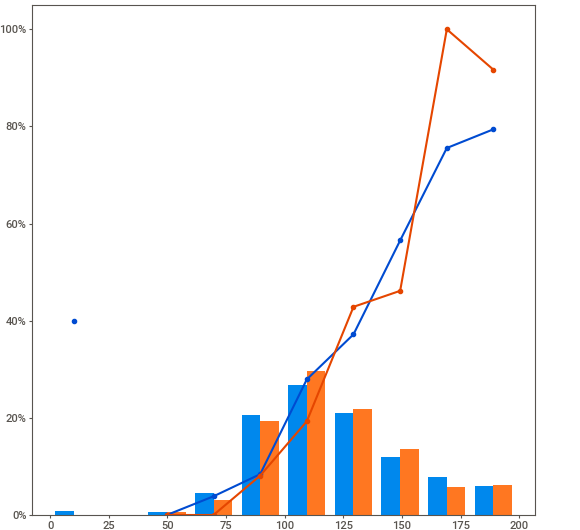
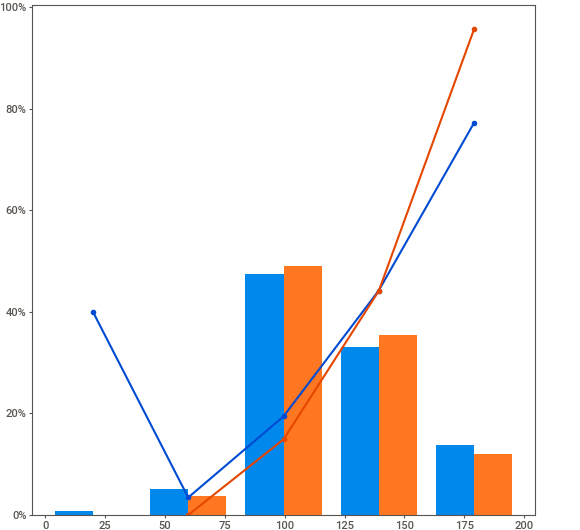
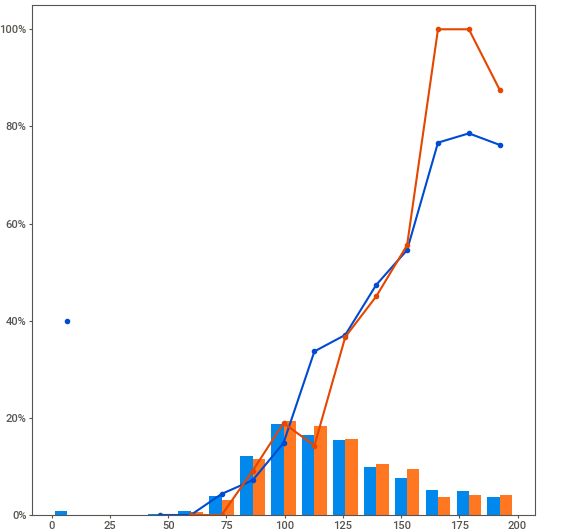
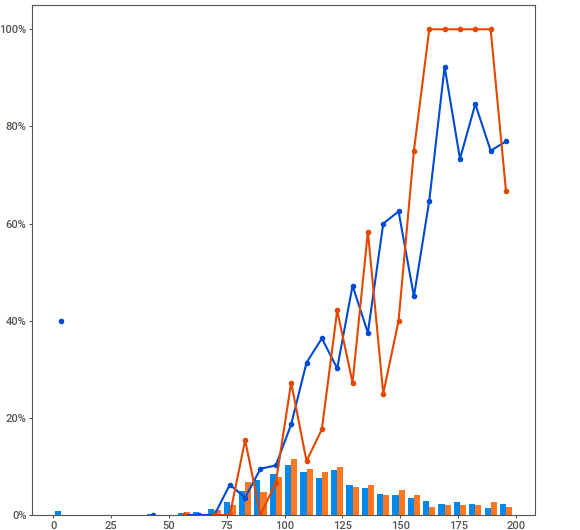
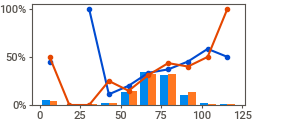
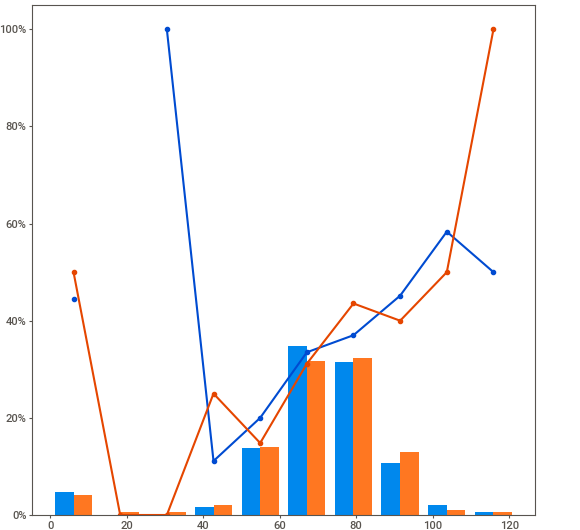
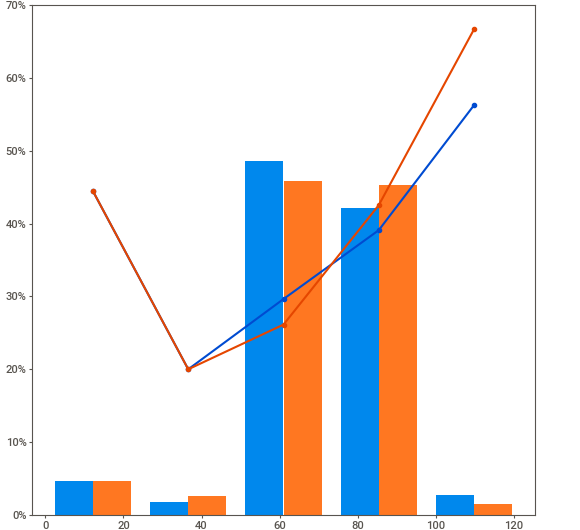
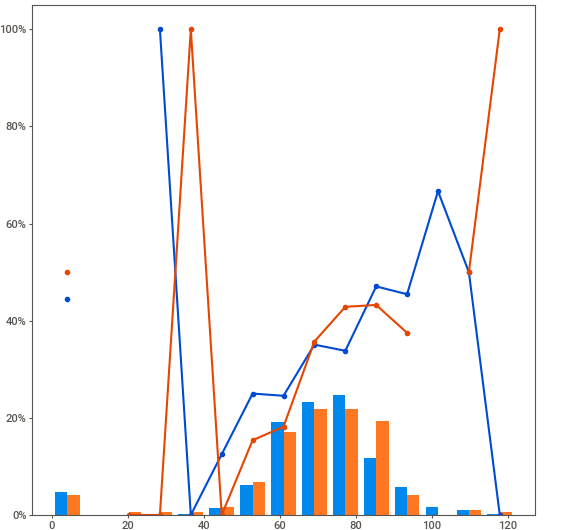
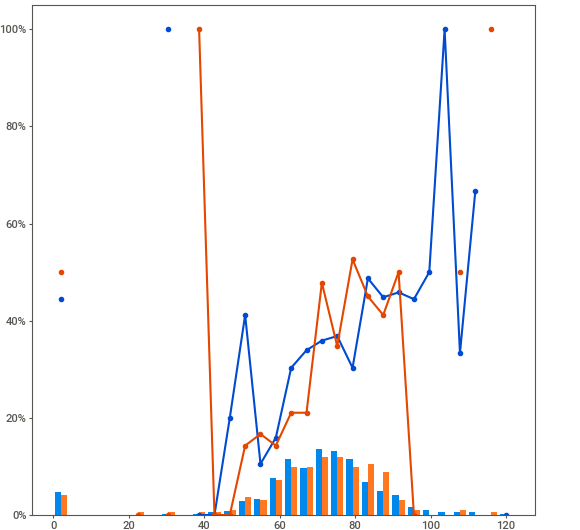
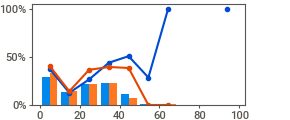
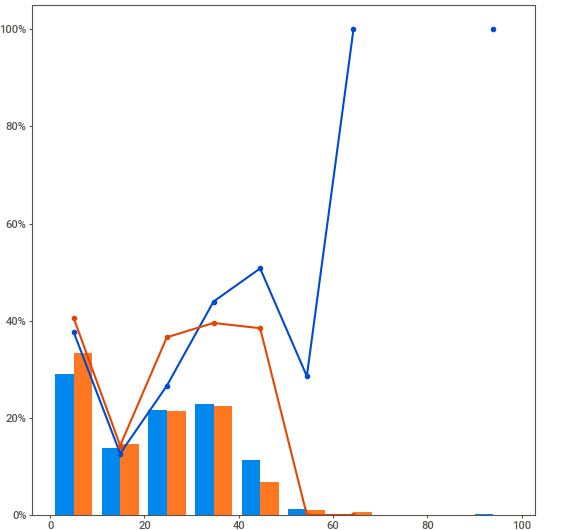
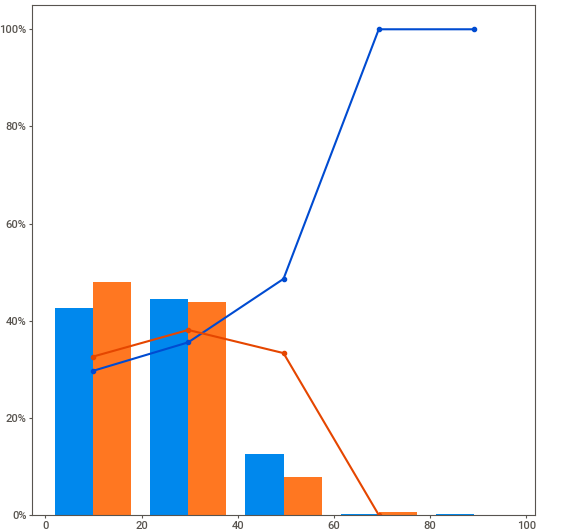
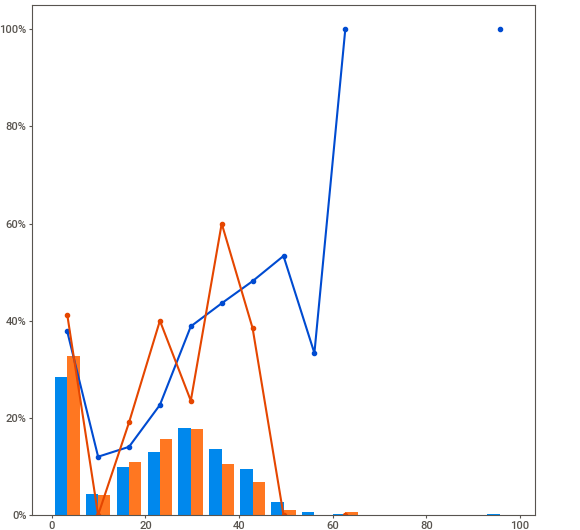
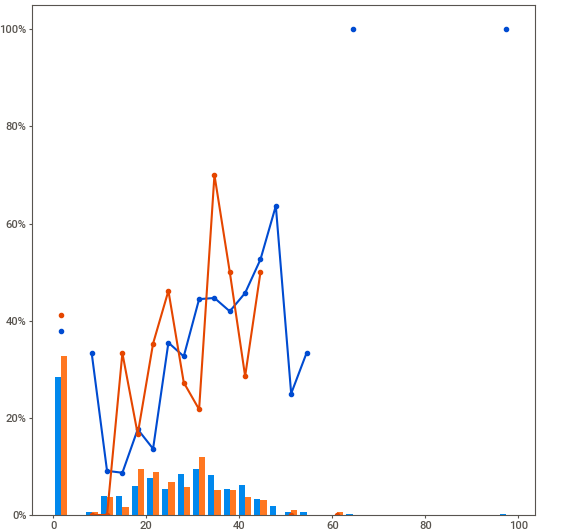
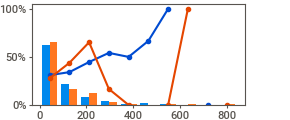
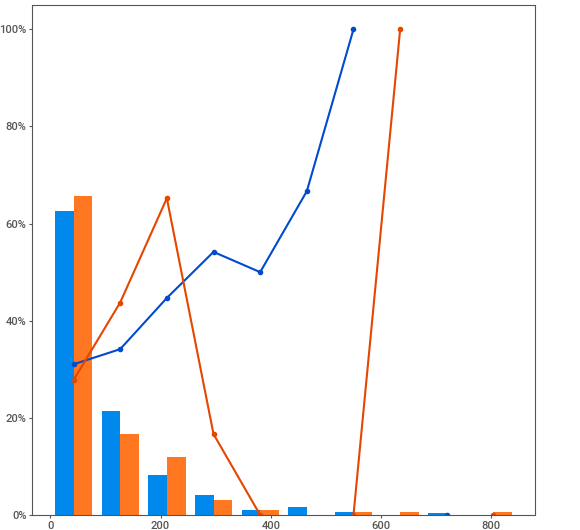
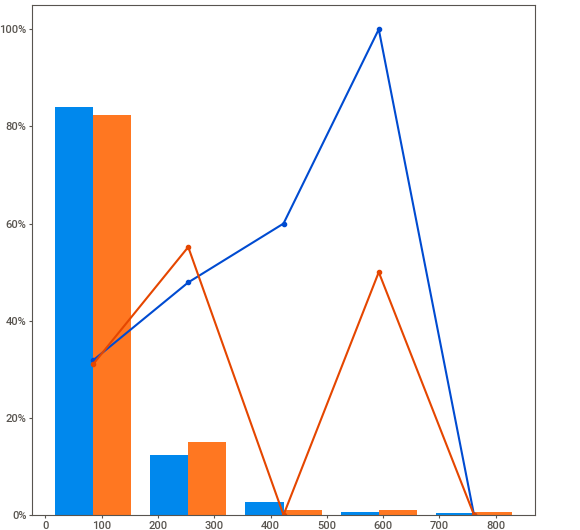
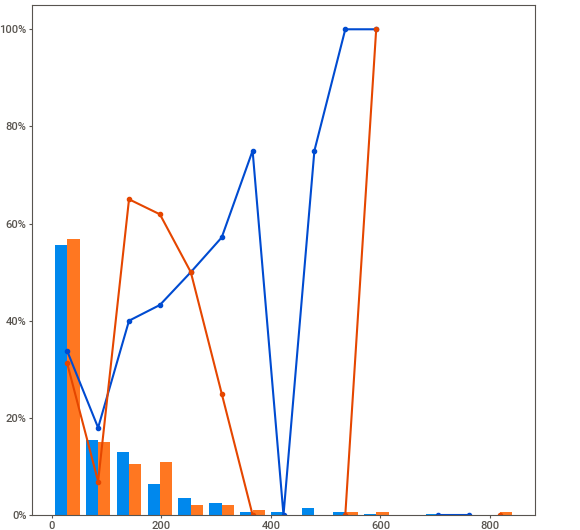
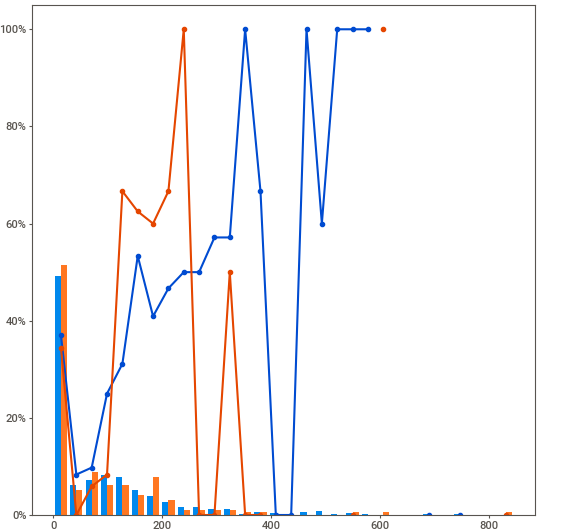
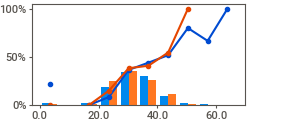
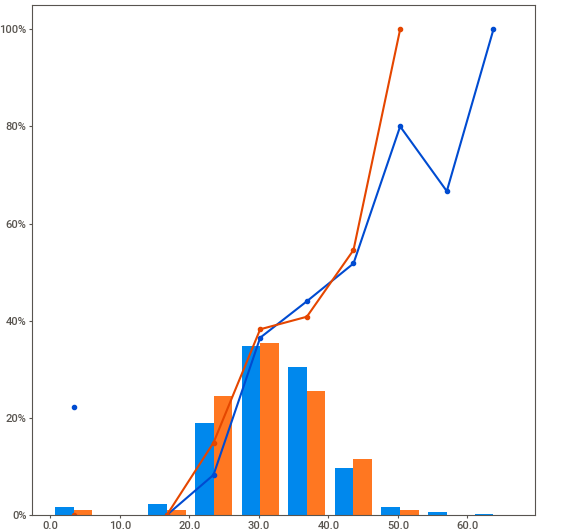
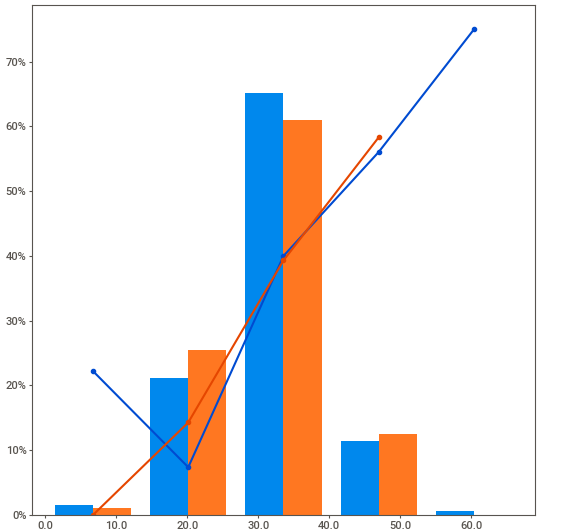
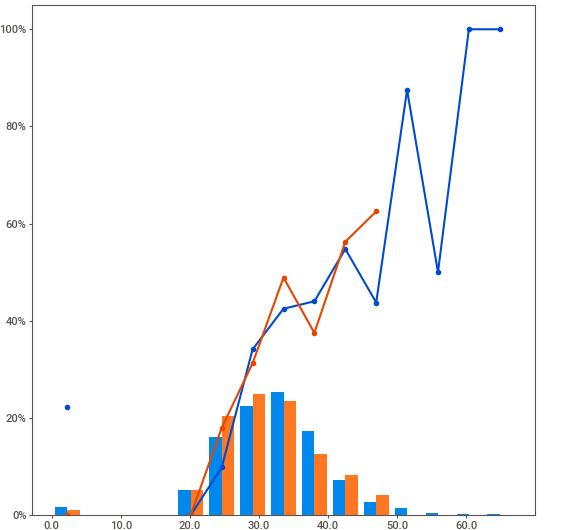
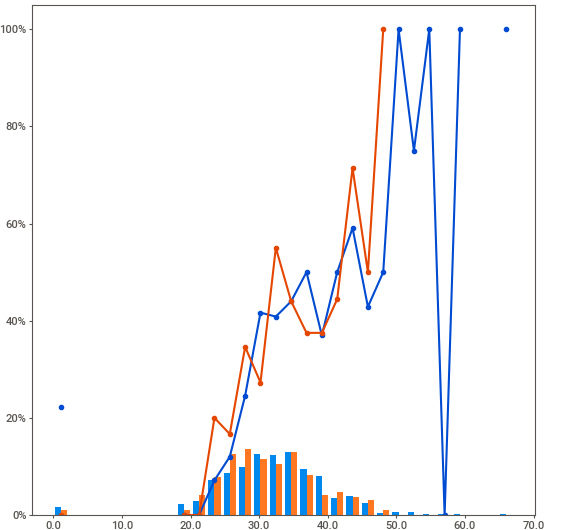
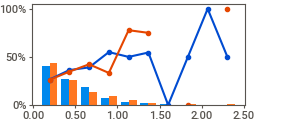
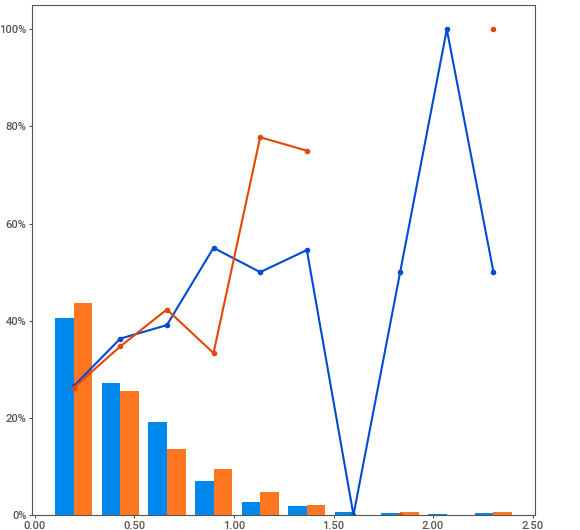
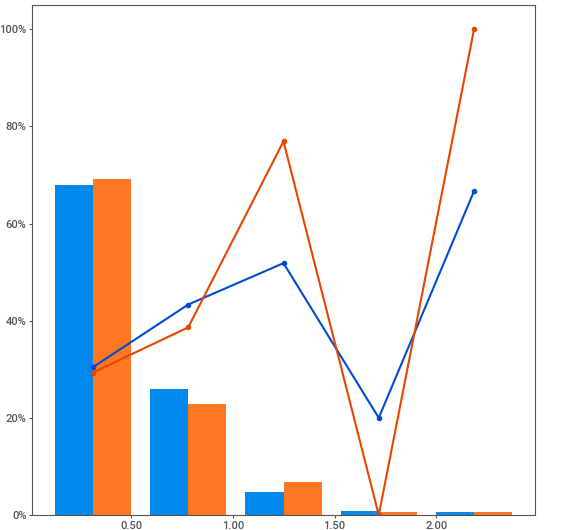
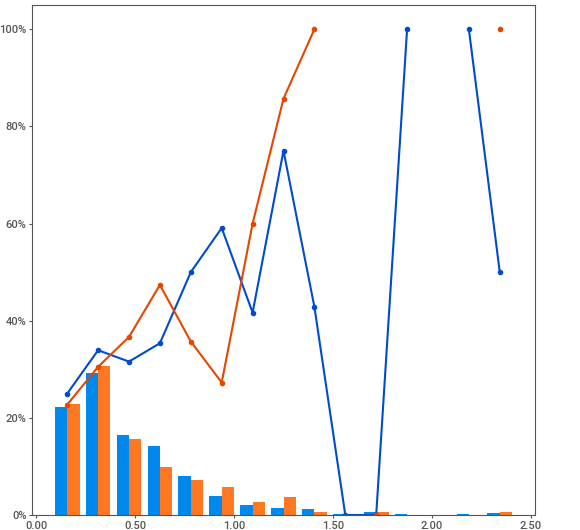
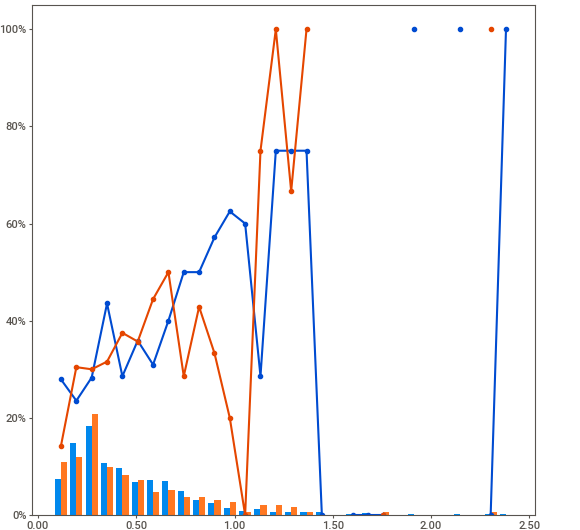
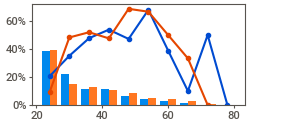
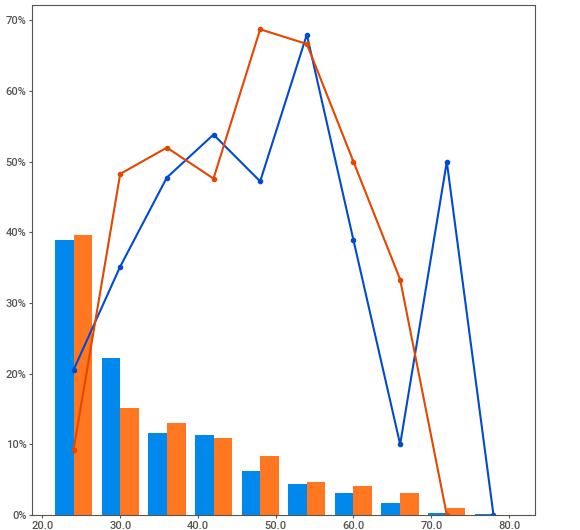
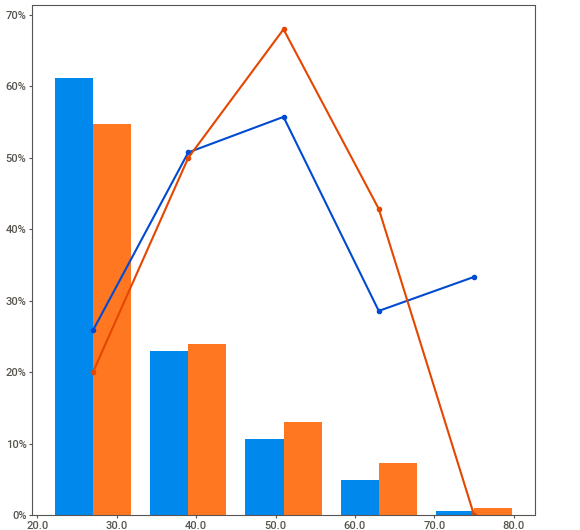
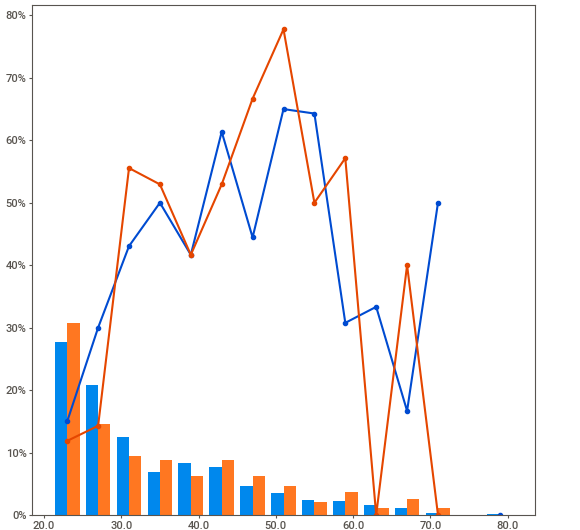
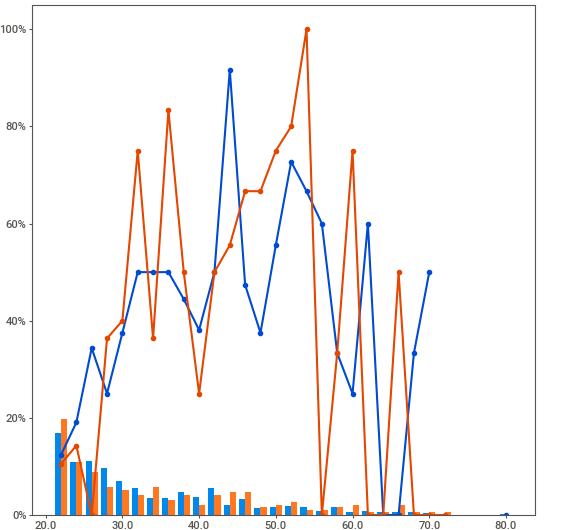
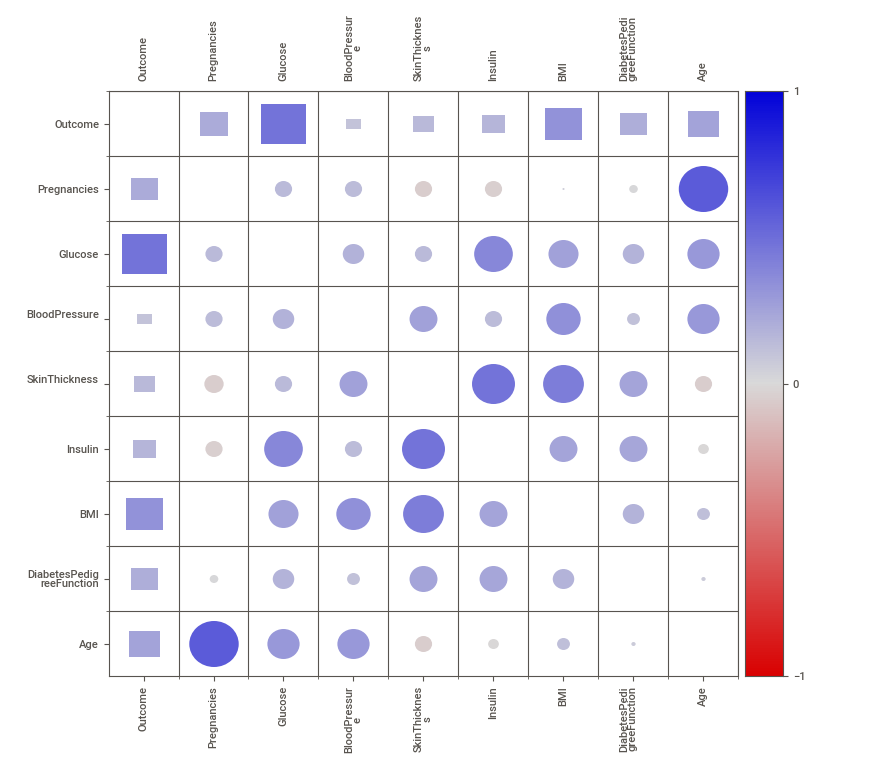
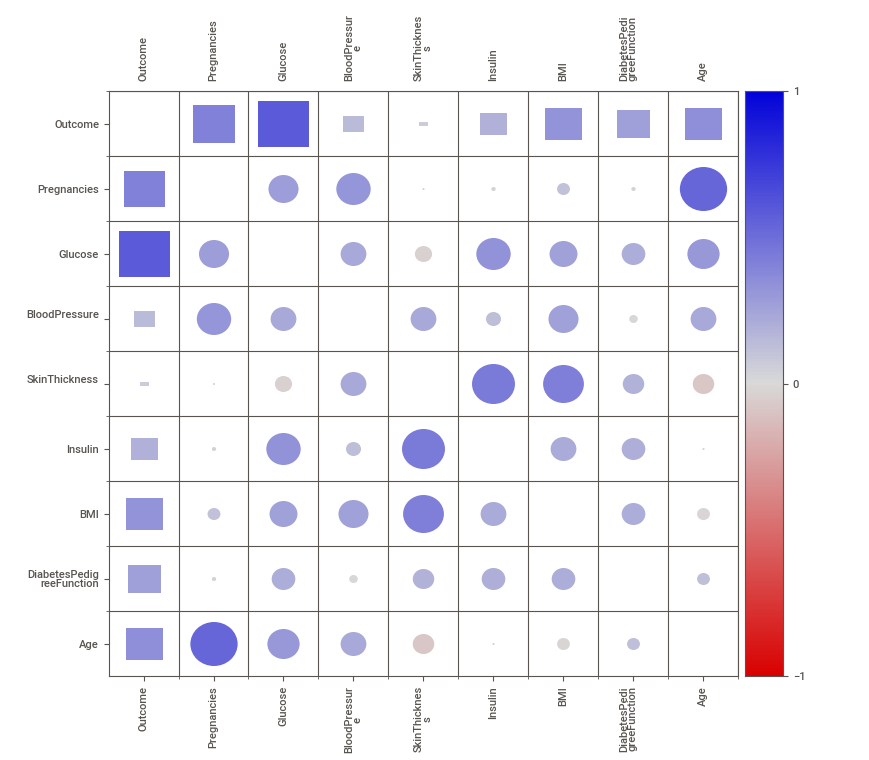

In [6]:
import sweetviz as sv

#analyzing the dataset
comparison_report = sv.compare([X_train, "Train"], [X_test, "Test"], target_feat="Outcome")
comparison_report.show_notebook()

The dataset is a bit imbalanced. It's not bad, but let's apply Synthetic Minority Oversampling Technique (SMOTE)

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

smt = SMOTE(random_state=16)
X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After', counter)

Before Counter({0: 375, 1: 201})
After Counter({1: 375, 0: 375})


Now the dataset we train on is more balanced

In [8]:
# Now we need to remove the Outcome column from the dataset
X_train = X_train.drop(columns=['Outcome'])
X_test = X_test.drop(columns=['Outcome'])

# We also need to remove Outcome from the feature_cols list
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

#### OK. Now on to the models. Logistic Regression first

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Now we have a trained model. Let's look at the confusion matrix for the test set.

In [10]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,  24],
       [ 17,  50]])

Calculate accuracy, precision, recall, and f1-score

In [11]:


# You can calculate the metrics from the confusion matrix using the following formulas:
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
print("Accuracy: ", (TP + TN) / float(TP + TN + FP + FN))
print("Precision: ", TP / float(TP + FP))
print("Recall: ", TP / float(TP + FN))
print("F1-Score: ", 2*TP / float(2*TP + FP + FN))

# You can also calculate the metrics using the built-in functions in the scikit-learn library:
print("\nCalculating metrics using the built-in functions in the scikit-learn library:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))


Accuracy:  0.7864583333333334
Precision:  0.6756756756756757
Recall:  0.746268656716418
F1-Score:  0.7092198581560284

Calculating metrics using the built-in functions in the scikit-learn library:
Accuracy: 0.7864583333333334
Precision: 0.6756756756756757
Recall: 0.746268656716418
F1-Score: 0.7092198581560283


We can also ask for the classification report

In [12]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.86      0.81      0.83       125
   with diabetes       0.68      0.75      0.71        67

        accuracy                           0.79       192
       macro avg       0.77      0.78      0.77       192
    weighted avg       0.79      0.79      0.79       192



Let's plot the confusion matrix in a nice heatmap

In [13]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cnf_matrix, title=''):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].set_title('Confusion Matrix')
    ax[1].set_title('Normalized Confusion Matrix')
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', ax=ax[0])
    sns.heatmap(pd.DataFrame(cnf_matrix/np.sum(cnf_matrix)), annot=True, cmap="YlGnBu" ,fmt='g', ax=ax[1])
    ax[0].xaxis.set_label_position("top")
    ax[1].xaxis.set_label_position("top")
    ax[0].set_ylabel('Actual label')
    ax[0].set_xlabel('Predicted label')
    ax[1].set_ylabel('Actual label')
    ax[1].set_xlabel('Predicted label')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

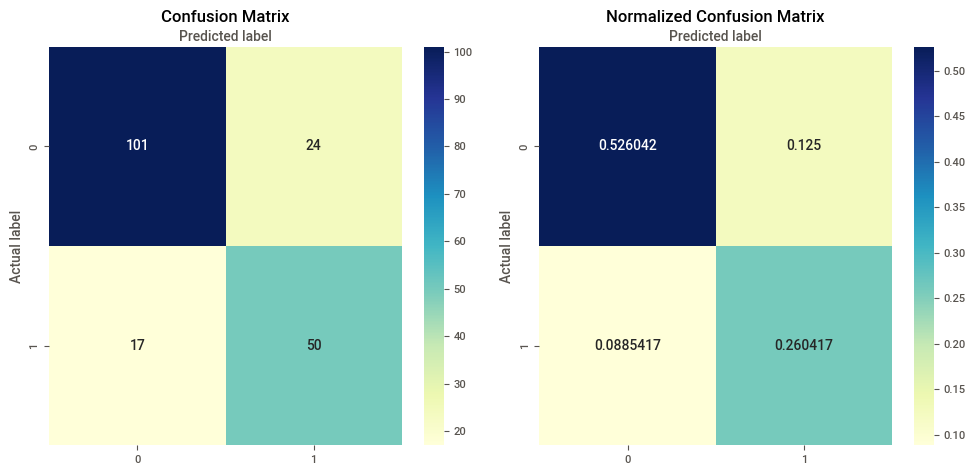

In [14]:
plot_confusion_matrix(cnf_matrix)

Now we can plot the ROC curve for the model. The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis. To plot it, the threshold for determining a class is varied and the TPR and FPR are recorded for each threshold value. So we need the actual values (y_test) and the predicted probabilities for our test set.

In [15]:
def plot_roc_curves(X_test, models, model_names):
    plt.figure(figsize=(10,5))
    for i in range(len(models)):
        y_pred_proba = models[i].predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr,tpr,label=model_names[i]+", auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

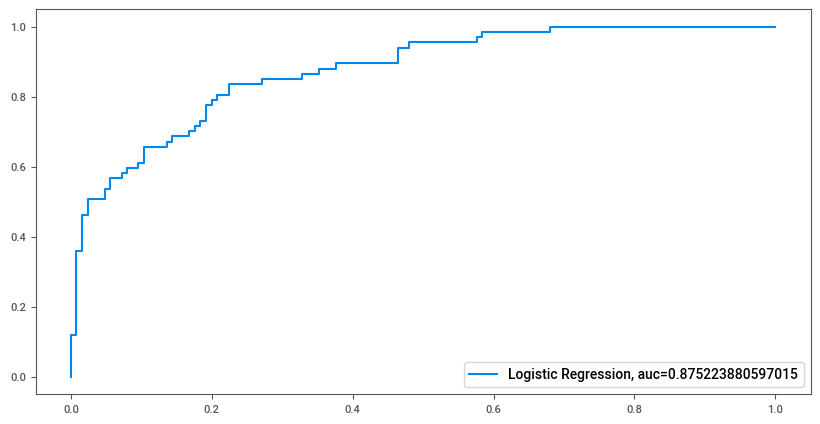

In [16]:
plot_roc_curves(X_test, [logreg], ['Logistic Regression'])

Logistic Regression is nice because it allows us to look at the coefficients to have an idea of the relative importance of the different features for the model.

In [17]:
logreg.coef_

array([[ 7.55104634e-02,  3.46953423e-02, -1.95289306e-02,
         6.18546174e-04, -1.90750361e-03,  1.01273347e-01,
         1.05004791e+00,  1.99520886e-02]])

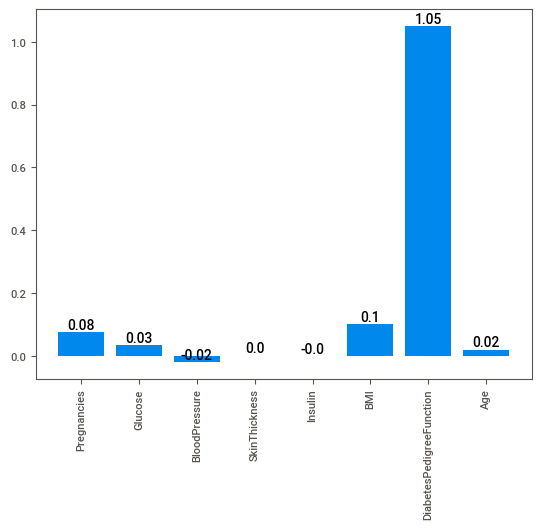

In [18]:
# Plot the feature importance
plt.bar([x for x in range(len(logreg.coef_[0]))], logreg.coef_[0])

# Add feature names as x-axis labels
plt.xticks(range(len(logreg.coef_[0])), feature_cols, rotation=90)

# Add coefficients at the tops of each bar
for i, v in enumerate(logreg.coef_[0]):
    plt.text(x=i, y=v+0.01, s=str(round(v, 2)), ha='center')
    
plt.show()

### Now let's try a couple of other models
We will learn about these classifiers later. This is just to show how we can do comparisons

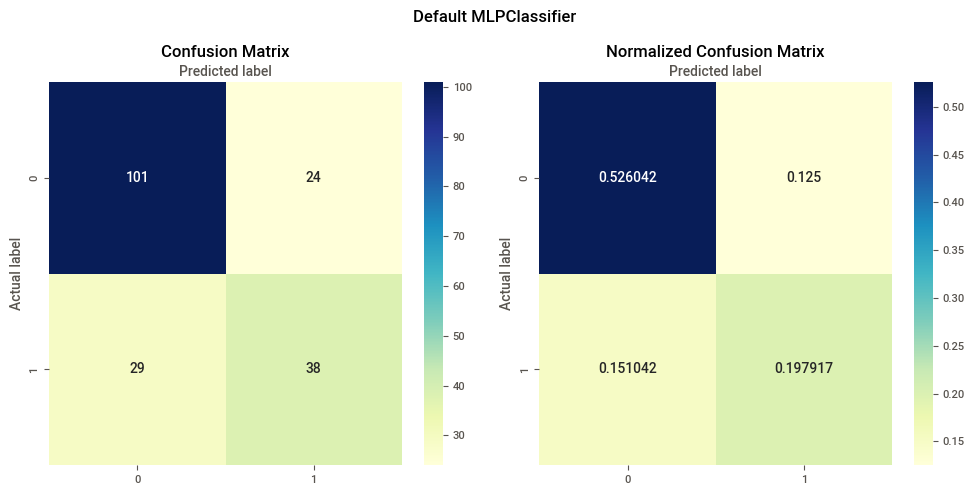

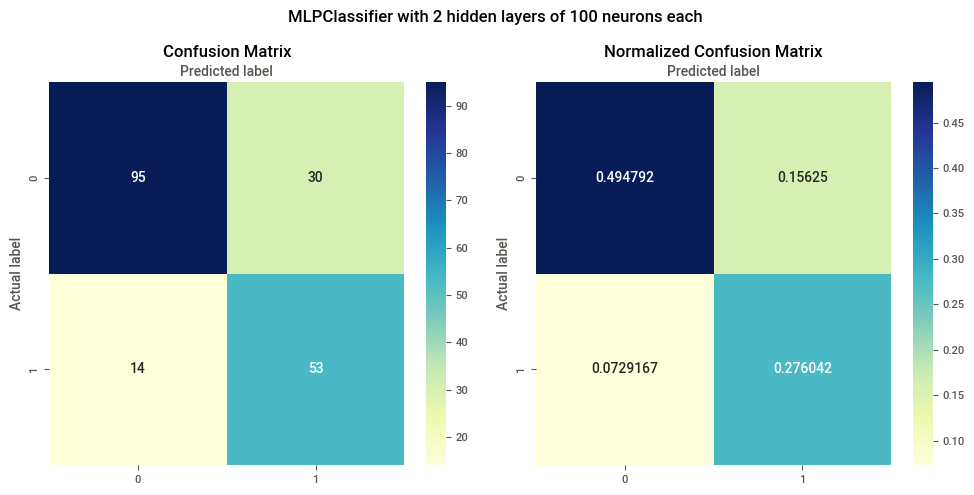

In [19]:
# Lets try another model - MLPClassifier
from sklearn.neural_network import MLPClassifier

dmlp = MLPClassifier(random_state=16, max_iter=1000)
dmlp.fit(X_train, y_train)
dmlp_y_pred = dmlp.predict(X_test)
dmlp_cnf_matrix = metrics.confusion_matrix(y_test, dmlp_y_pred)
plot_confusion_matrix(dmlp_cnf_matrix, title='Default MLPClassifier')


mlp = MLPClassifier(random_state=16, hidden_layer_sizes=(100,100), activation='logistic', max_iter=1000)
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)
mlp_cnf_matrix = metrics.confusion_matrix(y_test, mlp_y_pred)
plot_confusion_matrix(mlp_cnf_matrix, title='MLPClassifier with 2 hidden layers of 100 neurons each')

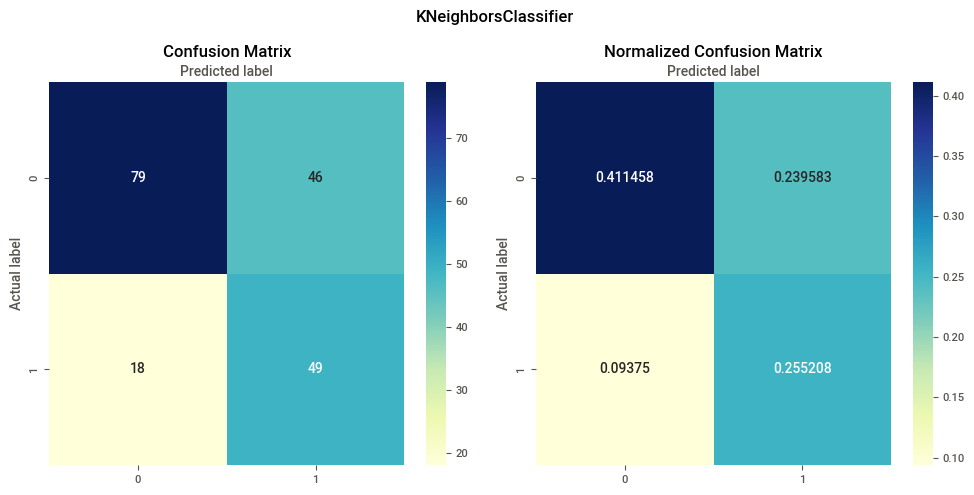

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_cnf_matrix = metrics.confusion_matrix(y_test, knn_y_pred)
plot_confusion_matrix(knn_cnf_matrix, title='KNeighborsClassifier')

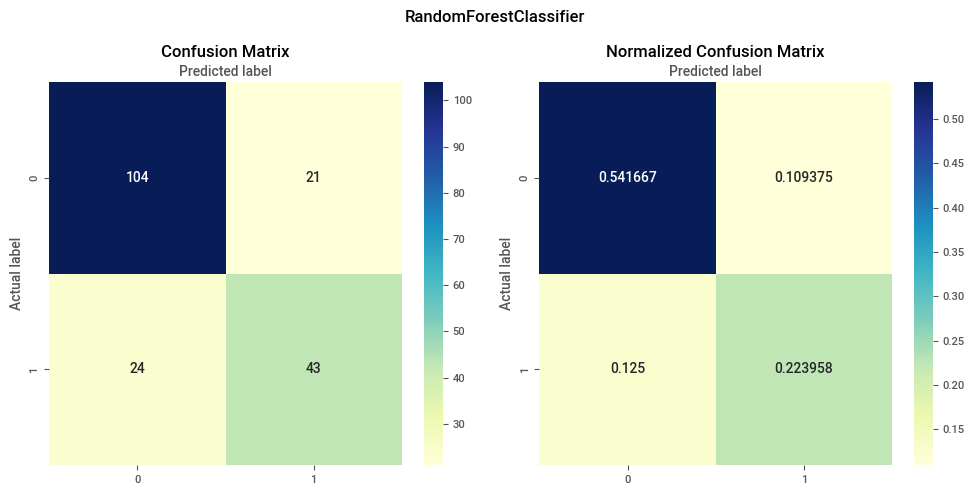

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=16)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_cnf_matrix = metrics.confusion_matrix(y_test, rf_y_pred)
plot_confusion_matrix(rf_cnf_matrix, title='RandomForestClassifier')

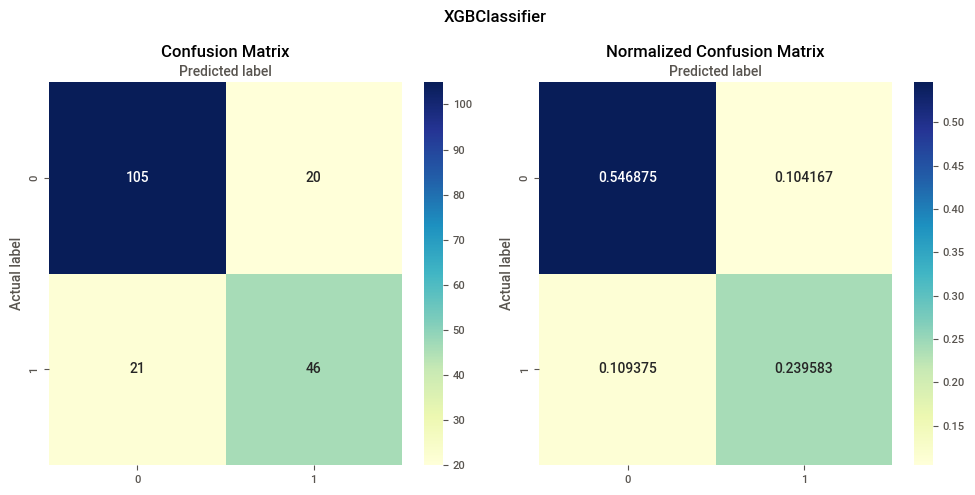

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
xgb_cnf_matrix = metrics.confusion_matrix(y_test, xgb_y_pred)
plot_confusion_matrix(xgb_cnf_matrix, title='XGBClassifier')

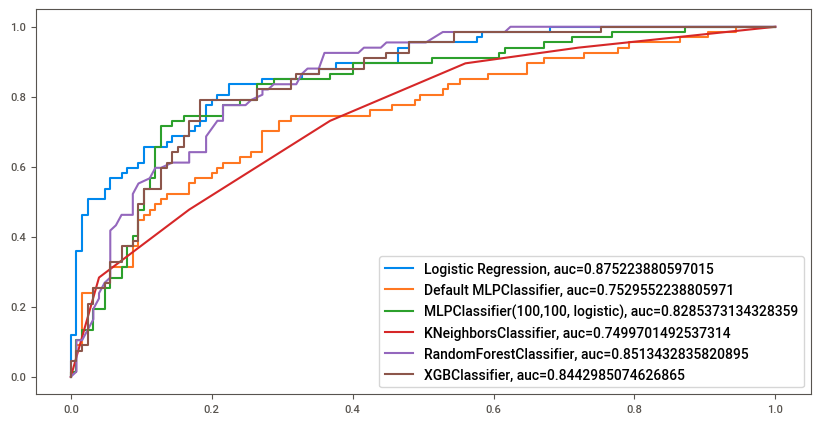

In [30]:
plot_roc_curves(X_test, [logreg, dmlp, mlp, knn, rf, xgb], 
                ['Logistic Regression', 'Default MLPClassifier', 'MLPClassifier(100,100, logistic)', 'KNeighborsClassifier', 'RandomForestClassifier', 'XGBClassifier'])

In this case, the Logistic Regression Classifier and Random Forest seem to be the best (depending on your threshold). We can save one model to be used later.

In [31]:
import pickle

filename = 'diabetes_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

We can then reload it and use it.

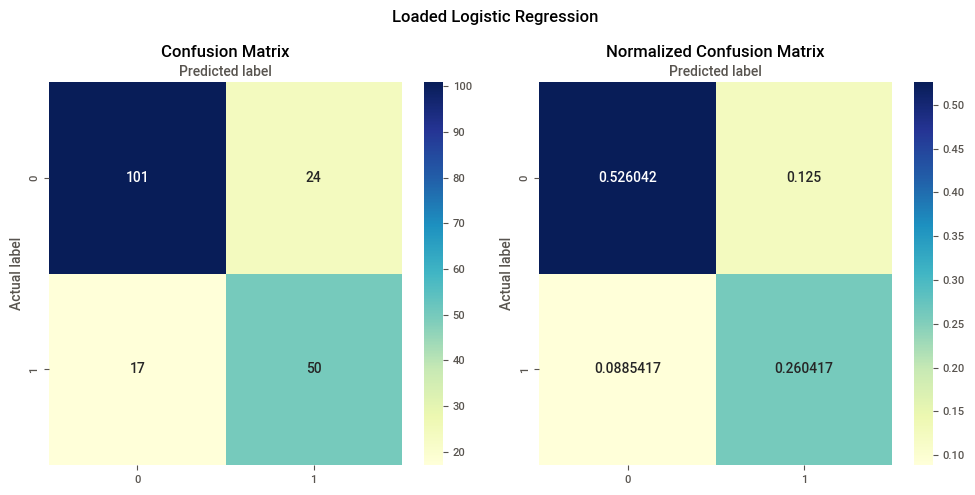

In [35]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_pred = loaded_model.predict(X_test)
loaded_cnf_matrix = metrics.confusion_matrix(y_test, loaded_pred)
plot_confusion_matrix(loaded_cnf_matrix, title='Loaded Logistic Regression')